In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
%matplotlib inline

In [119]:
# Loading data 
data = datasets.load_breast_cancer()
print(data.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [120]:
# Splitting data into validation (0.2), test (0.8*0.2) & train sets (0.8*0.8)
Y = data.target
X = data.data

X_validation, X_t, Y_validation, Y_t = train_test_split(X, Y, test_size=0.80, random_state=42)
X_test, X_train, Y_test, Y_train = train_test_split(X_t, Y_t, test_size=0.80, random_state=42)

In [121]:
# Normalization of the data for features
scaler = preprocessing.StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

scaler1 = preprocessing.StandardScaler().fit(X_train)
X_train = scaler1.transform(X_train)

scaler2 = preprocessing.StandardScaler().fit(X_validation)
X_validation = scaler2.transform(X_validation)

In [122]:
ac_op = 1.0 # optimal rate of correct classification
ft_op = 0.0 # optimal rate of false true classification

# First metric - Euclidian 

def euclidian_norm(ft,ac):
    return (ft-ft_op)**2+(ac-ac_op)**2 

# Idea
To know how the SVM method behaves through the state space of parameters, we will evaluate three types of kernels in a grid build as the cartesian product of variables:
   1. Gaussian: gamma related with standard deviation and C related with the level of error we can allow.
   2. Linear: C related with the level of error we can allow.
   3. Polynomial: D Degree of polynomial and C related with the level of error we can allow.
    

# Gaussian Kernel
---

In [123]:
N = 100 # num of points per variable 
delta = 0.1
CMAX = 4.0
CMIN = 0.001
GAMMAMAX = 1.4
GAMMAMIN = 0.001

GAMMA = np.linspace(GAMMAMIN,GAMMAMAX,N)
C = np.linspace(CMIN,CMAX,N)

grid_ft = np.zeros((N,N)) # GAMMA vs C
grid_ac = np.zeros((N,N)) # GAMMA vs C

for i in range (0,N):
    for j in range (0,N):
        kernel_svc = svm.SVC(C=C[j], kernel='rbf', gamma=GAMMA[i])
        kernel_svc.fit(X_train,Y_train)
        Y_predict = kernel_svc.predict(X_test)
        MAT = confusion_matrix(Y_test, Y_predict)
        grid_ft[i][j] = MAT[1][0]/sum(sum(MAT))
        grid_ac[i][j] = (MAT[0][0]+MAT[1][1]) / sum(sum(MAT))

In [124]:
gaussian_norm = euclidian_norm(grid_ft,grid_ac)

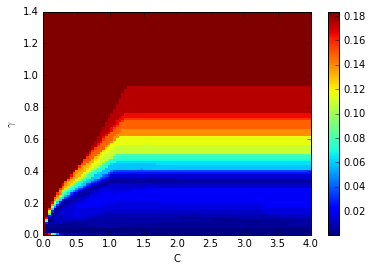

In [125]:
plt.clf()
plt.pcolormesh(C,GAMMA,gaussian_norm)
plt.ylabel('$\gamma$')
plt.xlabel('C')
plt.colorbar()

We can see that for small $\gamma$ and for almost all values of C greater than 0.5 the Euclidian metric is nearly zero. So let calculate the tf and correct classification for minimun:

In [132]:
# print the positions over the grid where metric has a minimun 
print('Minimun of the metric   ' + str(gaussian_norm.min()))
print('\nPositions where metrics has this value:   \n')
index = np.array(np.where(gaussian_norm == gaussian_norm.min()))
print('C index : '+str(index[1,1]))
print('GAMMA index : '+str(index[0,1]))

Minimun of the metric   0.000483033450066

Positions where metrics has this value:   

C index : 24
GAMMA index : 1


In [136]:
# So let me choose the first (the lowest values of C & GAMMA)
print('optimal C is : '+ str(C[index[1,1]]))
print('optimal GAMMA is : '+ str(GAMMA[index[0,1]]))
kernel_svc = svm.SVC(C=C[index[1,1]], kernel='rbf', gamma=GAMMA[index[0,1]])
kernel_svc.fit(X_train,Y_train)
Y_predict = kernel_svc.predict(X_test)

MAT = confusion_matrix(Y_test, Y_predict)
FT_G = MAT[1][0]/sum(sum(MAT))
CORRECT_G = (MAT[0][0] + MAT[1][1]) / sum(sum(MAT))
TF_G = MAT[0][1] / sum(sum(MAT))
print('\nmetric : ' +str(euclidian_norm(FT_G,CORRECT_G)))
print('FT : ' + str(FT_G*100)+' %')
print('Correct : ' + str(CORRECT_G*100)+' %')
print('TF : ' + str(TF_G *100)+' %')

optimal C is : 0.970454545455
optimal GAMMA is : 0.0151313131313

metric : 0.000483033450066
FT : 0.0 %
Correct : 97.8021978022 %
TF : 2.1978021978 %


# Lineal Kernel
---

In [137]:
N = 10000 # num of points per variable 
CMAX = 2.0
CMIN = 0.001

C = np.linspace(CMIN,CMAX,N)

grid_ft = np.zeros(N) 
grid_ac = np.zeros(N) 

for i in range (0,N):
    linear_svc = svm.SVC(C=C[i], kernel='linear')
    linear_svc.fit(X_train,Y_train)
    Y_predict = kernel_svc.predict(X_test)
    MAT = confusion_matrix(Y_test, Y_predict)
    grid_ft[i] = MAT[1][0]/sum(sum(MAT))
    grid_ac[i] = (MAT[0][0]+MAT[1][1]) / sum(sum(MAT))

In [138]:
linear_norm = euclidian_norm(grid_ft,grid_ac)

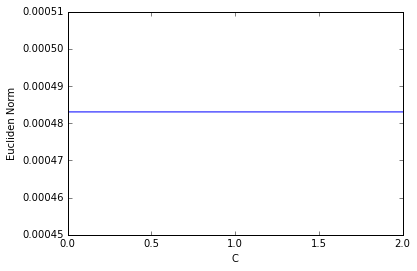

In [140]:
plt.plot(C,linear_norm)
plt.ylabel('Eucliden Norm')
plt.xlabel('C')

We can see that for all values of C the Euclidian metric has the same value. So let calculate the tf and correct classification for any:

In [148]:
# print the positions over the grid where metric has a minimun 
print('Minimun of the metric   ' + str(linear_norm.min()))
print('\nPositions where metrics has this value:   \n')
index = np.array(np.where(linear_norm == linear_norm.min()))
print('C index : ' +str(index[:,1]))

Minimun of the metric   0.000483033450066

Positions where metrics has this value:   

C index : [1]


In [149]:
print('optimal C is : '+ str(C[index[:,1]]))
linear_svc = svm.SVC(C=C[index[:,1]], kernel='linear')
kernel_svc.fit(X_train,Y_train)
Y_predict = kernel_svc.predict(X_test)
MAT = confusion_matrix(Y_test, Y_predict)
FT_L = MAT[1][0]/sum(sum(MAT))
CORRECT_L = (MAT[0][0] + MAT[1][1]) / sum(sum(MAT))
TF_L = MAT[0][1] / sum(sum(MAT))
print('\nmetric : ' +str(euclidian_norm(FT_L,CORRECT_L)))
print('FT : ' + str(FT_L*100)+' %')
print('Correct : ' + str(CORRECT_L*100)+' %')
print('TF : ' + str(TF_L *100)+' %')

optimal C is : [ 0.00119992]

metric : 0.000483033450066
FT : 0.0 %
Correct : 97.8021978022 %
TF : 2.1978021978 %


# Polynomial
---

In [163]:
N = 1000  
CMAX = 2.0
CMIN = 0.001
DMIN = 0
DMAX = 11
DN = DMAX-DMIN
C = np.linspace(CMIN,CMAX,N)
D = np.arange(DMIN,DMAX)

grid_ft = np.zeros((N,DN)) 
grid_ac = np.zeros((N,DN)) 
for i in range (0,N):
    for j in range (0,DN):
        kernel_svc = svm.SVC(C=C[i], kernel='poly', degree=D[j])
        kernel_svc.fit(X_train,Y_train)
        Y_predict = kernel_svc.predict(X_test)
        MAT = confusion_matrix(Y_test, Y_predict)
        grid_ft[i][j] = MAT[1][0]/sum(sum(MAT))
        grid_ac[i][j] = (MAT[0][0]+MAT[1][1]) / sum(sum(MAT))

In [164]:
poly_norm = euclidian_norm(grid_ft,grid_ac)

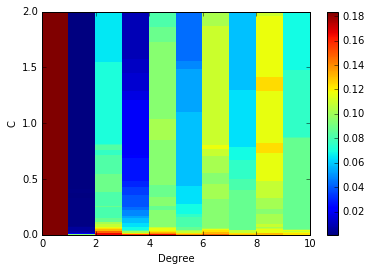

In [165]:
plt.pcolormesh(D,C,poly_norm)
plt.ylabel('C')
plt.xlabel('Degree')
plt.colorbar()

We can see that for small Degree (1) of polynomial and for almost all values of C the Euclidian metric is nearly zero. In the case of 0 Degree of polynomial it shows that the model has no adjustment. So let calculate the tf and correct classification for minimun:

In [166]:
# print the positions over the grid where metric has a minimun 
print('Minimun of the metric   ' + str(poly_norm.min()))
print('\nPositions where metrics has this value:   \n')
index = np.array(np.where(poly_norm == poly_norm.min()))
print('DEGREE index : '+str(index[1,1]))
print('C index : '+str(index[0,1]))

Minimun of the metric   0.00108682526265

Positions where metrics has this value:   

DEGREE index : 1
C index : 166


In [167]:
# So let me choose the first (the lowest values of C & GAMMA)
print('optimal C is : '+ str(C[index[0,1]]))
print('optimal Degree is : '+ str(D[index[1,1]]))
kernel_svc = svm.SVC(C=C[index[0,1]], kernel='poly', degree=D[index[1,1]])
kernel_svc.fit(X_train,Y_train)
Y_predict = kernel_svc.predict(X_test)
MAT = confusion_matrix(Y_test, Y_predict)
FT_P = MAT[1][0]/sum(sum(MAT))
CORRECT_P = (MAT[0][0] + MAT[1][1]) / sum(sum(MAT))
TF_P = MAT[0][1] / sum(sum(MAT))
print('\nmetric : ' +str(euclidian_norm(FT_P,CORRECT_P)))
print('FT : ' + str(FT_P*100)+' %')
print('Correct : ' + str(CORRECT_P*100)+' %')
print('TF : ' + str(TF_P *100)+' %')

optimal C is : 0.333166166166
optimal Degree is : 1

metric : 0.00108682526265
FT : 0.0 %
Correct : 96.7032967033 %
TF : 3.2967032967 %
